In [49]:
import tensorflow as t
import numpy as n
import matplotlib.pyplot as p
import imageio

In [50]:
(trainX, trainY), (testX, testY) = t.keras.datasets.mnist.load_data()
trainX = trainX / 255
testX = testX / 255

In [51]:
print(trainX.shape, 'train shape')
print(testX.shape, 'test shape')

(60000, 28, 28) train shape
(10000, 28, 28) test shape


In [52]:
trainY = t.keras.utils.to_categorical(trainY, 10)
testY = t.keras.utils.to_categorical(testY, 10)


In [53]:
model = t.keras.models.Sequential([
    t.keras.layers.Flatten(input_shape=(28,28,1)),
      t.keras.layers.Dense(100, activation = t.nn.relu),
      t.keras.layers.Dense(10, activation = t.nn.softmax)                                
])

In [54]:
model.compile(loss=t.keras.losses.categorical_crossentropy, optimizer=t.keras.optimizers.Adam(), metrics=['accuracy'])


In [55]:
history = model.fit(trainX, trainY, batch_size=32, epochs=11)

Epoch 1/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2786 - accuracy: 0.9201
Epoch 2/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1278 - accuracy: 0.9622
Epoch 3/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0901 - accuracy: 0.9727
Epoch 4/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0680 - accuracy: 0.9790
Epoch 5/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0540 - accuracy: 0.9835
Epoch 6/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0431 - accuracy: 0.9865
Epoch 7/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0354 - accuracy: 0.9892
Epoch 8/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0298 - accuracy: 0.9908
Epoch 9/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0244 - accuracy: 0.9930
Epoch 10/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.021

In [56]:
print(model.evaluate(trainX, trainY))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0140 - accuracy: 0.9960
[0.013981806114315987, 0.9960333108901978]


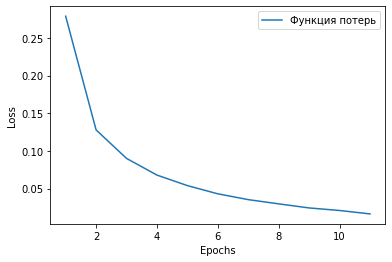

In [57]:
loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)

p.plot(epochs, loss_values, label='Функция потерь')
p.xlabel('Epochs')
p.ylabel('Loss')
p.legend()

p.show()

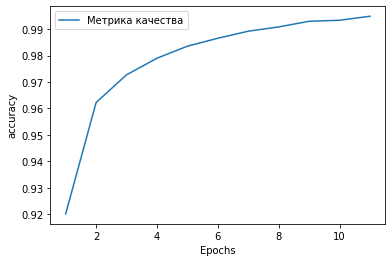

In [58]:
accu_values = history.history['accuracy']
epochs = range(1, len(accu_values)+1)
p.plot(epochs, accu_values, label='Метрика качества')
p.xlabel('Epochs')
p.ylabel('accuracy')
p.legend()

p.show()

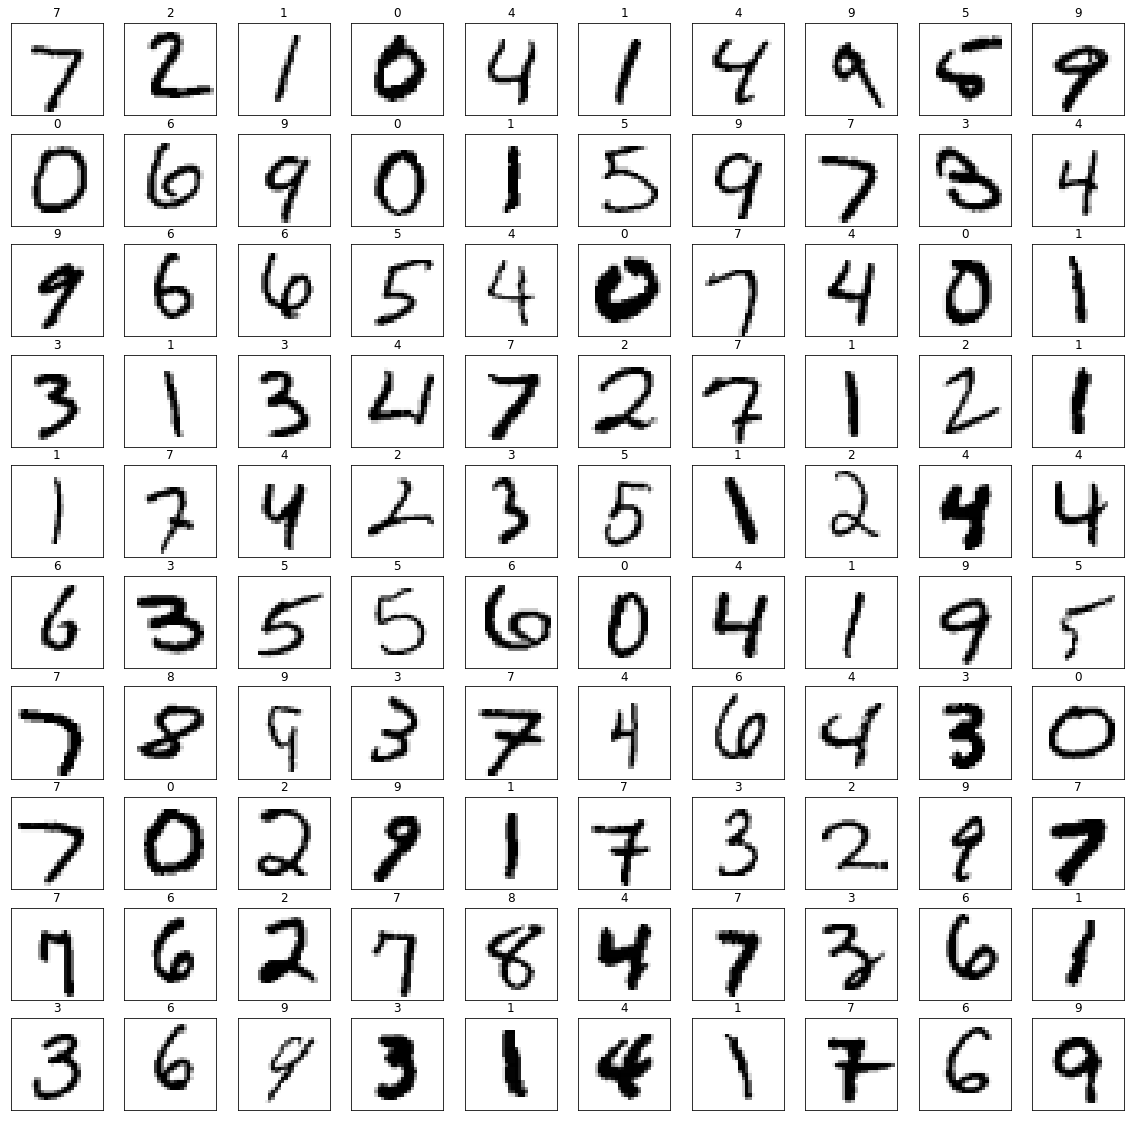

In [61]:
p.figure(figsize=(20,20))
for i in range(100):
  p.subplot(10,10, i+1)
  p.xticks([])
  p.yticks([])
  pic = n.expand_dims(testX[i], axis = 0)
  ot = model.predict(pic.reshape(-1, 28, 28, 1))
  p.imshow(testX[i], cmap=p.cm.binary)
  p.title(n.argmax(ot))
